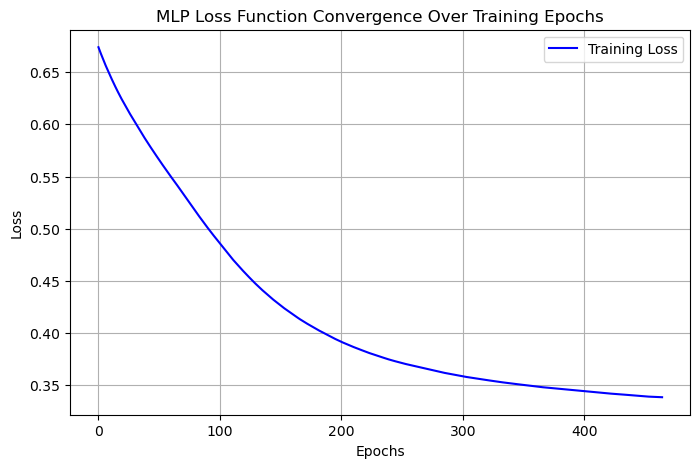

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate the non-linear dataset (Moons Dataset)
X, y = make_moons(n_samples=300, noise=0.25, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train MLP and record loss curve
mlp_with_loss = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=500, random_state=0, verbose=False)
mlp_with_loss.fit(X_train, y_train)

# Plotting Loss Convergence
plt.figure(figsize=(8, 5))
plt.plot(mlp_with_loss.loss_curve_, label="Training Loss", color="blue")
plt.title('MLP Loss Function Convergence Over Training Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


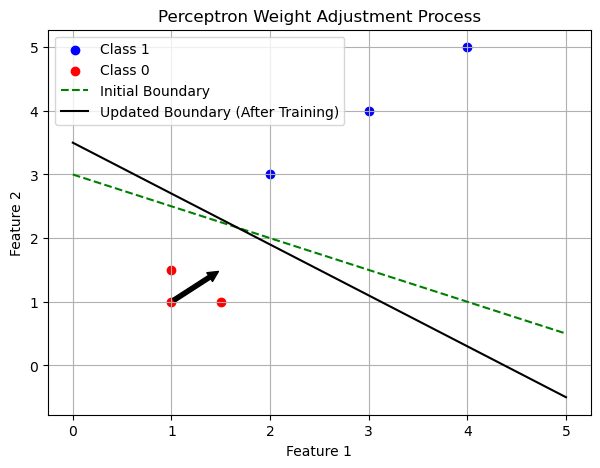

In [11]:
# Generate Weight Adjustment Process in Perceptron
import matplotlib.patches as patches
import numpy as np

fig, ax = plt.subplots(figsize=(7,5))

# Plotting points (linearly separable)
X_pos = np.array([[2, 3], [3, 4], [4, 5]])
X_neg = np.array([[1, 1], [1.5, 1], [1, 1.5]])
ax.scatter(X_pos[:, 0], X_pos[:, 1], c='blue', label='Class 1')
ax.scatter(X_neg[:, 0], X_neg[:, 1], c='red', label='Class 0')

# Initial Decision Boundary
x_vals = np.linspace(0, 5, 100)
y_vals = (-0.5 * x_vals) + 3
ax.plot(x_vals, y_vals, 'g--', label='Initial Boundary')

# Updated Decision Boundary (After Weight Adjustment)
y_vals_updated = (-0.8 * x_vals) + 3.5
ax.plot(x_vals, y_vals_updated, 'black', label='Updated Boundary (After Training)')

# Adding arrows to show weight adjustment
arrow = patches.FancyArrowPatch((1, 1), (1.5, 1.5), mutation_scale=15, color='black')
ax.add_patch(arrow)

# Adding titles and labels
ax.set_title('Perceptron Weight Adjustment Process')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend(loc='best')
ax.grid(True)

plt.show()


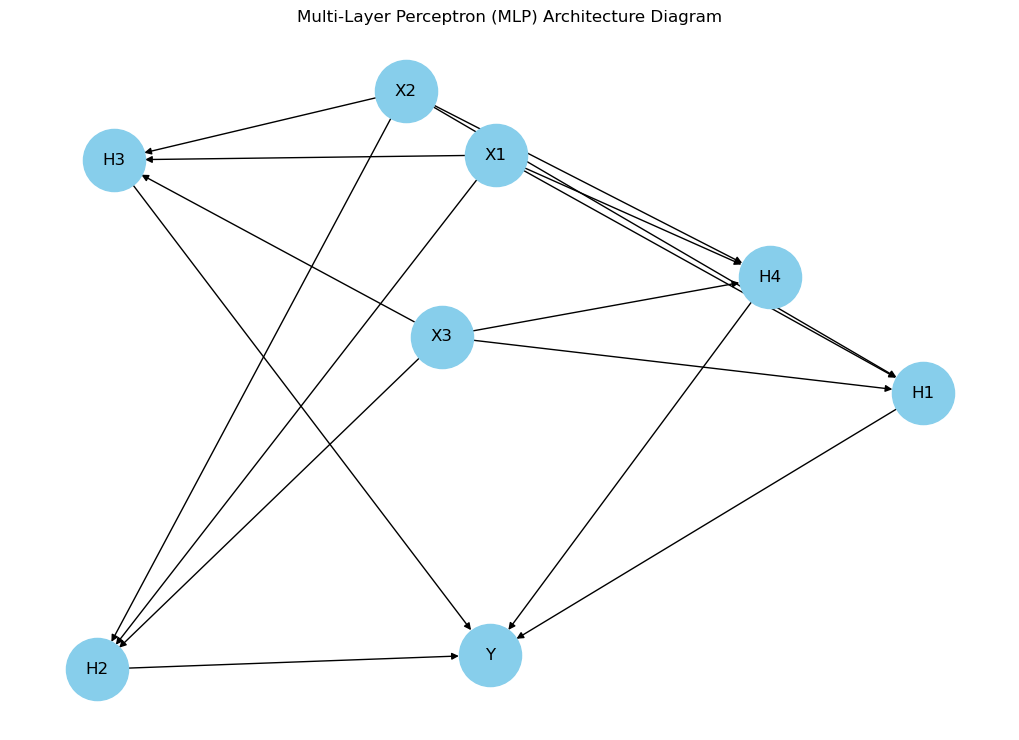

In [15]:
# Generate MLP Architecture Diagram
import networkx as nx

# Define the MLP structure
mlp_graph = nx.DiGraph()

# Adding input layer nodes
input_nodes = [f"X{i+1}" for i in range(3)]
hidden_nodes = [f"H{i+1}" for i in range(4)]
output_nodes = ["Y"]

# Adding edges from Input Layer to Hidden Layer
for inp in input_nodes:
    for hid in hidden_nodes:
        mlp_graph.add_edge(inp, hid)

# Adding edges from Hidden Layer to Output Layer
for hid in hidden_nodes:
    for out in output_nodes:
        mlp_graph.add_edge(hid, out)

# Drawing the MLP diagram
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(mlp_graph, seed=42)
nx.draw(mlp_graph, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=12, arrows=True, edge_color="black")
plt.title("Multi-Layer Perceptron (MLP) Architecture Diagram")
plt.show()


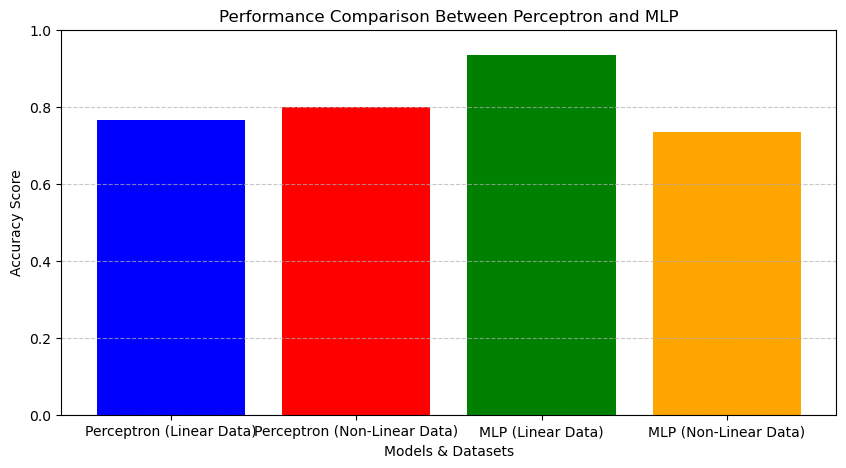

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Generate linear and non-linear datasets
X1, y1 = make_classification(n_samples=150, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=0)
X2, y2 = make_moons(n_samples=150, noise=0.25, random_state=0)

# Split datasets into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

# Train Perceptron and MLP models
perceptron = Perceptron(max_iter=1000, random_state=0)
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000, random_state=0)

# Training and evaluating Perceptron on Linear and Non-Linear Datasets
perceptron.fit(X1_train, y1_train)
perceptron_linear_acc = accuracy_score(y1_test, perceptron.predict(X1_test))

perceptron.fit(X2_train, y2_train)
perceptron_nonlinear_acc = accuracy_score(y2_test, perceptron.predict(X2_test))

# Training and evaluating MLP on Linear and Non-Linear Datasets
mlp.fit(X1_train, y1_train)
mlp_linear_acc = accuracy_score(y1_test, mlp.predict(X1_test))

mlp.fit(X2_train, y2_train)
mlp_nonlinear_acc = accuracy_score(y2_test, mlp.predict(X2_test))

# Plotting Performance Comparison Chart
models = ['Perceptron (Linear Data)', 'Perceptron (Non-Linear Data)', 
          'MLP (Linear Data)', 'MLP (Non-Linear Data)']
accuracies = [perceptron_linear_acc, perceptron_nonlinear_acc, 
              mlp_linear_acc, mlp_nonlinear_acc]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color=['blue', 'red', 'green', 'orange'])
plt.title('Performance Comparison Between Perceptron and MLP')
plt.xlabel('Models & Datasets')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
